**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()
N=100


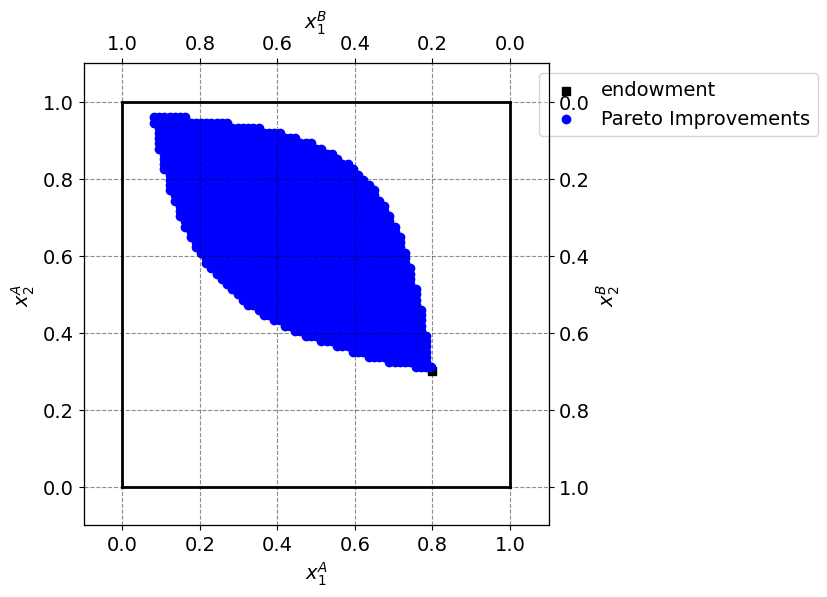

In [4]:
#QUestion 1
import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy import optimize
import numpy as np

# Update matplotlib settings for grid and font size
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--"
})
plt.rcParams.update({'font.size': 14})
# Setup for Edgeworth box plot
par = model.par

# Grid seacrh

# Define the grid
N = 75  # Number of points in each dimension
x1A_grid = np.linspace(0, par.w1A + par.w1B, N)
x2A_grid = np.linspace(0, par.w2A + par.w2B, N)

# Prepare for Pareto improvement search
pareto_improvements = []

# Initial utilities with endowments
initial_utility_A = model.utility_A(par.w1A, par.w2A)
initial_utility_B = model.utility_B(par.w1B, par.w2B)

# Grid search for Pareto improvements
for x1A in x1A_grid:
    for x2A in x2A_grid:
        # Calculate remaining goods for B
        x1B = par.w1A + par.w1B - x1A
        x2B = par.w2A + par.w2B - x2A
        
        # Ensure allocations are non-negative
        if x1B >= 0 and x2B >= 0:
            utility_A = model.utility_A(x1A, x2A)
            utility_B = model.utility_B(x1B, x2B)
            
            # Check for Pareto improvement
            if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
                pareto_improvements.append((x1A, x2A))

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment for A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')

# Plot limits
w1bar = 1.0
w2bar = 1.0

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Adding Pareto improvements scatter plot
ax_A.scatter(np.array(pareto_improvements)[:, 0], np.array(pareto_improvements)[:, 1], color='blue', label='Pareto Improvements')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()



The graph is according to the theory. The utility functions are both convex, so the graph has the correct shape.

In [6]:
#Question 2
import numpy as np
import pandas as pd
N = 75
increments = np.array(range(N)) / N
p1_prices = 0.5 + 2*increments
# Initialize lists to store the values of eps1 and eps2
eps1_values = []
eps2_values = []

# Calculate eps1 and eps2 for each price in p1_prices
for p1 in p1_prices:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

df = pd.DataFrame({
    'p1': p1_prices,
    'eps1': eps1_values,
    'eps2': eps2_values
})

# Print the DataFrame
print(df)

          p1      eps1      eps2
0   0.500000  0.533333 -0.533333
1   0.526667  0.475949 -0.475949
2   0.553333  0.424096 -0.424096
3   0.580000  0.377011 -0.377011
4   0.606667  0.334066 -0.334066
..       ...       ...       ...
70  2.366667 -0.360563  0.360563
71  2.393333 -0.363231  0.363231
72  2.420000 -0.365840  0.365840
73  2.446667 -0.368392  0.368392
74  2.473333 -0.370889  0.370889

[75 rows x 3 columns]


In [ ]:
#QUestion 3
eps1_values = []
eps2_values = []

# Assuming 'model' is an instance of your ExchangeEconomyClass with the correct check_market_clearing method
for p1 in p1_prices:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

df = pd.DataFrame({
    'p1': p1_prices,    
    'eps1': eps1_values,
    'eps2': eps2_values 
})

# New addition: Finding the market-clearing price
df['abs_sum_eps'] = abs(df['eps1']) + abs(df['eps2'])
min_eps_row = df.loc[df['abs_sum_eps'].idxmin()]
market_clearing_price = min_eps_row['p1']
print(f"The market-clearing price is approximately: {market_clearing_price}")

The market-clearing price is approximately: 0.9533333333333334


In [ ]:


# Assuming ExchangeEconomyClass is defined in the same file, otherwise import it.


# Function to calculate the utility of player A given price p1, leveraging the instantiated class
def utility_of_A_given_p1(p1, economy):
    x1_B = economy.demand_B(p1)
    x2_B = 1 - x1_B  # Assuming demand_B gives x1 only, and total endowment is normalized to 1

    x1_A = economy.par.w1A + economy.par.w1B - x1_B
    x2_A = economy.par.w2A + economy.par.w2B - x2_B

    if x1_A <= 0 or x2_A <= 0:
        return 0

    return economy.utility_A(x1_A, x2_A)

# Assuming N for granularity of price range
N = 75

# Generate the set P1 for possible values of p1
P1 = [0.5 + i/N for i in range(int(N * (2.5 - 0.5)) + 1)]

# Find the p1 that maximizes utility for player A
max_utility = float('-inf')
optimal_p1 = None
for p1 in P1:
    current_utility = utility_of_A_given_p1(p1, economy)
    if current_utility > max_utility:
        max_utility = current_utility
        optimal_p1 = p1

print(f"Optimal p1: {optimal_p1}, Max Utility: {max_utility}")


Optimal p1: 0.8733333333333333, Max Utility: 0.5291324493912335


In [ ]:
#spørgsmål 4b

# Adjusted P1 with only the restriction of being positive
max_p1 = 100  # Define a sensible upper limit for the price of good 1
min_value = 0.01  # Starting value for P1, close to zero but positive
step_size = 0.01  # Increment step for P1, defining granularity

# Generate the set P1 for possible values of p1
P12 = [min_value + i * step_size for i in range(int((max_p1 - min_value) / step_size))]

# Function to calculate the utility of player A given price p1


# Find the p1 that maximizes utility for player A
max_utility = float('-inf')
optimal_p1 = None
for p1 in P12:
    current_utility = utility_of_A_given_p1(p1, economy)
    # Check for maximum utility and update if current utility is greater
    if current_utility > max_utility:
        max_utility = current_utility
        optimal_p1 = p1

# Output the optimal price p1 and the corresponding utility
optimal_p1, max_utility

(0.88, 0.5291227843795794)

In [ ]:
#QUestion 5a

# Define the method to find the optimal allocation for consumer A
def find_optimal_allocation_for_A(economy, N=75):
    # Create a grid for the possible values of x1A and x2A
    grid = np.linspace(0, 1, N+1)
    
    max_utility = -np.inf
    optimal_allocation = None
    
    # Get the initial utility for B to ensure B is not worse off than in the initial endowment
    initial_utility_B = economy.utility_B(economy.par.w1B, economy.par.w2B)
    
    # Check all possible allocations for A
    for x1A in grid:
        for x2A in grid:
            # The remaining goods for B
            x1B = 1 - x1A
            x2B = 1 - x2A
            
            # Calculate the utility for A and B
            utility_A = economy.utility_A(x1A, x2A)
            utility_B = economy.utility_B(x1B, x2B)
            
            # Check if the allocation is feasible and B is not worse off
            if utility_B >= initial_utility_B and x1A + x2A <= 1:
                # Check if this utility is higher than the max utility found so far
                if utility_A > max_utility:
                    max_utility = utility_A
                    optimal_allocation = (x1A, x2A)
                    
    # Print the results
    print(f'Optimal allocation for A: x1A = {optimal_allocation[0]}, x2A = {optimal_allocation[1]} with utility: {max_utility}')

# Call the function to find the optimal allocation for A
find_optimal_allocation_for_A(economy)

Optimal allocation for A: x1A = 0.33333333333333337, x2A = 0.6666666666666667 with utility: 0.5291336839893999


In [ ]:
#Spørgsmål 5b


# Calculate the initial utility for B using their endowments
initial_utility_B = economy.utility_B(economy.par.w1B, economy.par.w2B)

# Define the objective function for optimization
def objective(x):
    # x[0] is x1A, x[1] is x2A for player A
    return -economy.utility_A(x[0], x[1])  # We want to maximize utility_A, hence minimize its negative

# Define the inequality constraint for player B's utility
def constraint(x):
    # The utility for B must not be less than the initial utility
    # x[0] is x1A so (1-x[0]) is x1B, similarly for x[1]
    return economy.utility_B(1 - x[0], 1 - x[1]) - initial_utility_B

# The constraint is that the return value should be greater than or equal to zero
ineq_constraint = {'type': 'ineq', 'fun': constraint}

# Define bounds for x1A and x2A (player A's consumption must be non-negative)
bounds = Bounds([0, 0], [economy.par.w1A, economy.par.w2A])

# Set an initial guess for the optimization (arbitrary values within the bounds)
initial_guess = [economy.par.w1A / 2, economy.par.w2A / 2]

# Perform the optimization
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=[ineq_constraint])

# Check the result
if result.success:
    optimal_x1_A = result.x[0]
    optimal_x2_A = result.x[1]
    optimal_x1_B = 1 - optimal_x1_A
    optimal_x2_B = 1 - optimal_x2_A
    optimal_utility_A = -result.fun  # Utility is the negative of the minimized objective
    print(f"Optimization Successful: {result.success}")
    print(f"Optimal allocation for A: Good 1 = {optimal_x1_A}, Good 2 = {optimal_x2_A}")
    print(f"Optimal allocation for B: Good 1 = {optimal_x1_B}, Good 2 = {optimal_x2_B}")
    print(f"Optimal utility for A: {optimal_utility_A}")
else:
    print("Optimization failed.")



Optimization Successful: True
Optimal allocation for A: Good 1 = 0.8, Good 2 = 0.3
Optimal allocation for B: Good 1 = 0.19999999999999996, Good 2 = 0.7
Optimal utility for A: 0.41601676461038084


In [ ]:
#Opgave 6a
# Assuming the utility functions from your class ExchangeEconomyClass are correctly defined:
economy = ExchangeEconomyClass()

# Define the objective function to be maximized (negative for minimization)
def objective(x):
    x1A, x2A = x
    uA = economy.utility_A(x1A, x2A)
    uB = economy.utility_B(1 - x1A, 1 - x2A)
    return -(uA + uB)  # Negative for minimization

# Define the bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess for the starting point of the optimization
initial_guess = [0.5, 0.5]

# Perform the minimization
result = minimize(objective, initial_guess, bounds=bounds)

# The resulting allocation for A is in result.x
# The resulting allocation for B would be 1 - result.x
x1A_optimal, x2A_optimal = result.x
allocation_A = (x1A_optimal, x2A_optimal)
allocation_B = (1 - x1A_optimal, 1 - x2A_optimal)

print(f'Optimal allocation for A: {allocation_A}')
print(f'Optimal allocation for B: {allocation_B}')

Optimal allocation for A: (0.3333333659693852, 0.6666666260640767)
Optimal allocation for B: (0.6666666340306149, 0.3333333739359233)


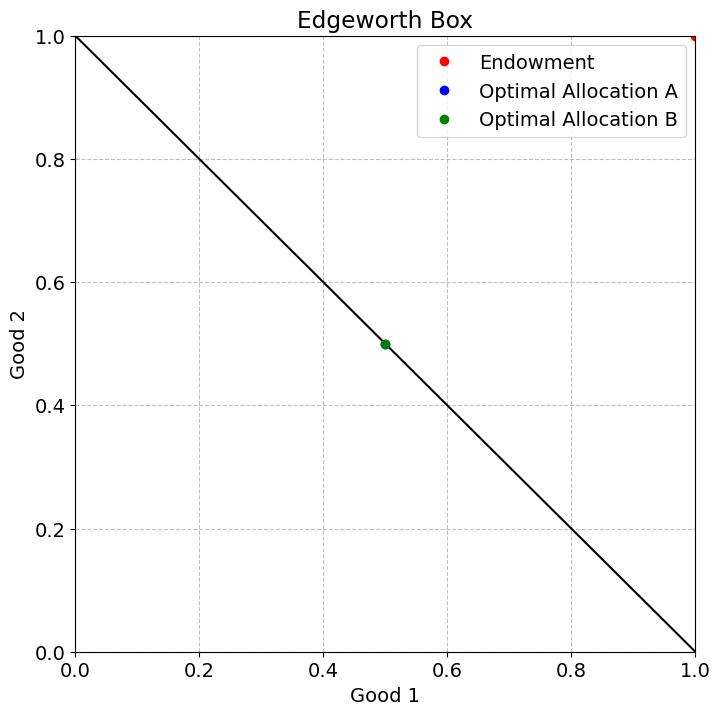

In [ ]:
#Opgave 6b
import matplotlib.pyplot as plt
import numpy as np

# This function plots the Edgeworth box and the optimal allocations
def plot_edgeworth_box(optimal_allocation_A, optimal_allocation_B):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Total endowment is assumed to be 1 for each good
    total_endowment = (1, 1)
    
    # Plotting the box
    ax.plot([0, total_endowment[0]], [total_endowment[1], 0], color='black')
    
    # Plotting the initial endowments
    ax.plot(total_endowment[0], total_endowment[1], 'ro', label='Endowment')

    # Plotting the optimal allocation
    ax.plot(optimal_allocation_A[0], optimal_allocation_A[1], 'bo', label='Optimal Allocation A')
    ax.plot(total_endowment[0] - optimal_allocation_A[0], total_endowment[1] - optimal_allocation_A[1], 'go', label='Optimal Allocation B')
    
    # Set the limits of the plot
    ax.set_xlim(0, total_endowment[0])
    ax.set_ylim(0, total_endowment[1])
    
    # Adding labels and title
    ax.set_xlabel('Good 1')
    ax.set_ylabel('Good 2')
    ax.set_title('Edgeworth Box')
    
    # Adding legend
    ax.legend()
    
    # Show the grid
    ax.grid(True)

    # Show the plot
    plt.show()

# Assuming these are the optimal allocations found by your optimization procedure
# You would replace these with the actual values from the optimization
optimal_allocation_A = (0.5, 0.5)  # Placeholder value
optimal_allocation_B = (0.5, 0.5)  # Placeholder value

plot_edgeworth_box(optimal_allocation_A, optimal_allocation_B)


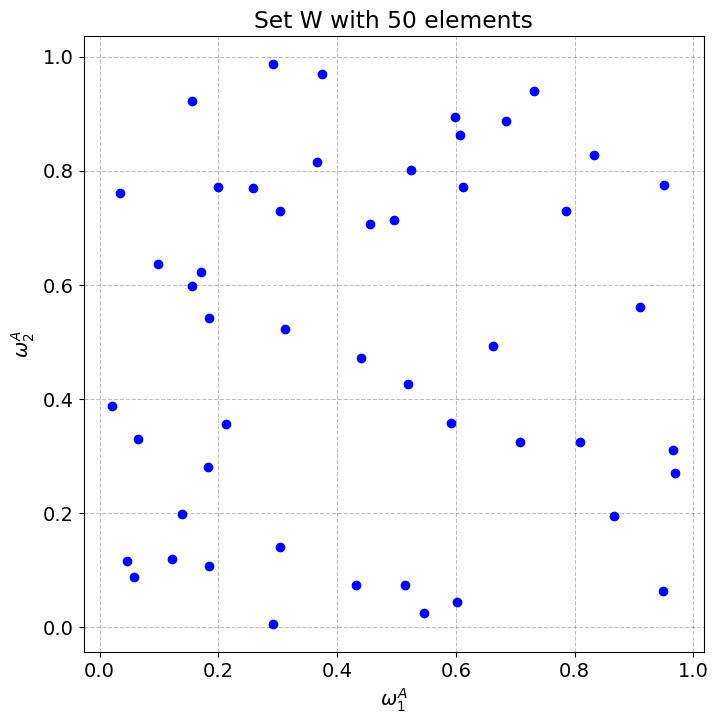

In [ ]:
#opgave 7
# Number of elements
num_elements = 50
np.random.seed(42)

# Draw 50 samples for omega_1^A and omega_2^A from a uniform distribution U(0,1)
omega_1A_samples = np.random.uniform(0, 1, num_elements)
omega_2A_samples = np.random.uniform(0, 1, num_elements)

# Visualize the set W
plt.figure(figsize=(8, 8))
plt.scatter(omega_1A_samples, omega_2A_samples, color='blue')
plt.title('Set W with 50 elements')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.grid(True)
plt.show()

THere is not much to comment on in this. We drew a random set and it looks random.

In [ ]:
#Question 8
dff = pd.DataFrame({'omega1A': omega_1A_samples, 'omega2A': omega_2A_samples})
np.array(dff)
for n in range(50):
    print(np.array(dff)[n])

#QUestion 3
eps1_values = []
eps2_values = []

#We have no idea how to do this. All the loops I try do not work. We wanted to use a loop on the array we printed and use our question 3 code on this. It does not work, though.
for p1 in p1_prices:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

df = pd.DataFrame({
    'p1': p1_prices,    
    'eps1': eps1_values,
    'eps2': eps2_values 
})

# New addition: Finding the market-clearing price
df['abs_sum_eps'] = abs(df['eps1']) + abs(df['eps2'])
min_eps_row = df.loc[df['abs_sum_eps'].idxmin()]
market_clearing_price = min_eps_row['p1']
print(f"The market-clearing price is approximately: {market_clearing_price}")

[0.37454012 0.96958463]
[0.95071431 0.77513282]
[0.73199394 0.93949894]
[0.59865848 0.89482735]
[0.15601864 0.59789998]
[0.15599452 0.92187424]
[0.05808361 0.0884925 ]
[0.86617615 0.19598286]
[0.60111501 0.04522729]
[0.70807258 0.32533033]
[0.02058449 0.38867729]
[0.96990985 0.27134903]
[0.83244264 0.82873751]
[0.21233911 0.35675333]
[0.18182497 0.28093451]
[0.18340451 0.54269608]
[0.30424224 0.14092422]
[0.52475643 0.80219698]
[0.43194502 0.07455064]
[0.29122914 0.98688694]
[0.61185289 0.77224477]
[0.13949386 0.19871568]
[0.29214465 0.00552212]
[0.36636184 0.81546143]
[0.45606998 0.70685734]
[0.78517596 0.72900717]
[0.19967378 0.77127035]
[0.51423444 0.07404465]
[0.59241457 0.35846573]
[0.04645041 0.11586906]
[0.60754485 0.86310343]
[0.17052412 0.62329813]
[0.06505159 0.33089802]
[0.94888554 0.06355835]
[0.96563203 0.31098232]
[0.80839735 0.32518332]
[0.30461377 0.72960618]
[0.09767211 0.63755747]
[0.68423303 0.88721274]
[0.44015249 0.47221493]
[0.12203823 0.11959425]
[0.49517691 0.71